Image De-noiser with Keras Autoencoder(NN)

In [67]:
import keras 
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, Conv2DTranspose
from keras.constraints import max_norm
import matplotlib.pyplot as plt
import numpy as np

In [68]:
# Load MNIST dataset 
(input_train, target_train), (input_test, target_test) = mnist.load_data()

In [69]:
input_train.shape, input_test.shape, target_train.shape


((60000, 28, 28), (10000, 28, 28), (60000,))

In [70]:
#sample

In [71]:
# Model configuration
img_width, img_height = 28, 28
batch_size = 128
no_epochs = 7 
validation_split = 0.2
verbosity = 1
max_norm_value = 2
noise_factor = 0.90


In [72]:
input_train = input_train.reshape(input_train.shape[0], img_width, img_height, 1)
input_test = input_test.reshape(input_test.shape[0], img_width, img_height, 1)
input_shape = (img_width, img_height, 1)

In [73]:
input_train.shape, input_test.shape, input_shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (28, 28, 1))

In [74]:
# Parse numbers as flots
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

In [75]:
#input_test[0]

In [76]:
#Normalization
input_train = input_train / 255
input_test = input_test / 255

In [77]:
#Add noise
pure = input_train
pure_test = input_test
noise = np.random.normal(0, 1, pure.shape)
noise_test = np.random.normal(0, 1, pure_test.shape)

noisy_input = pure + noise_factor * noise
noisy_input_test = pure_test + noise_factor * noise_test

#noise.shape, noise

In [78]:
from keras.layers.serialization import activation
# Create Model

model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', input_shape = input_shape))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))

model.add(Conv2DTranspose(32, kernel_size=(3,3), activation='relu'))
model.add(Conv2DTranspose(64, kernel_size=(3,3), activation='relu'))


model.add(Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='same'))

In [79]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 conv2d_10 (Conv2D)          (None, 24, 24, 32)        18464     
                                                                 
 conv2d_transpose_6 (Conv2DT  (None, 26, 26, 32)       9248      
 ranspose)                                                       
                                                                 
 conv2d_transpose_7 (Conv2DT  (None, 28, 28, 64)       18496     
 ranspose)                                                       
                                                                 
 conv2d_11 (Conv2D)          (None, 28, 28, 1)         577       
                                                                 
Total params: 47,425
Trainable params: 47,425
Non-trai

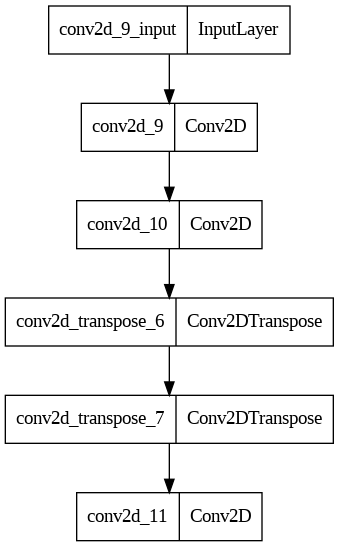

In [80]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model.png')

In [81]:
# compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy')

In [82]:
#Train the model

history = model.fit(noisy_input,
                    pure,
                    epochs=no_epochs,
                    batch_size=batch_size,
                    validation_split=validation_split,
                    verbose=verbosity)

Epoch 1/7
375/375 [==============================] - 8s 20ms/step - loss: 0.1884 - val_loss: 0.1577
Epoch 2/7
375/375 [==============================] - 6s 17ms/step - loss: 0.1538 - val_loss: 0.1517
Epoch 3/7
375/375 [==============================] - 7s 18ms/step - loss: 0.1502 - val_loss: 0.1498
Epoch 4/7
375/375 [==============================] - 6s 17ms/step - loss: 0.1488 - val_loss: 0.1516
Epoch 5/7
375/375 [==============================] - 6s 17ms/step - loss: 0.1477 - val_loss: 0.1490
Epoch 6/7
375/375 [==============================] - 6s 16ms/step - loss: 0.1469 - val_loss: 0.1476
Epoch 7/7
375/375 [==============================] - 6s 17ms/step - loss: 0.1465 - val_loss: 0.1468


In [83]:
# Generate denoised images
number_of_vizs = 2
samples = noisy_input_test[:number_of_vizs]
targets = target_test[:number_of_vizs]
denoised_images = model.predict(samples)

1/1 [==============================] - 0s 91ms/step


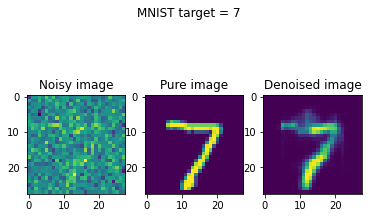

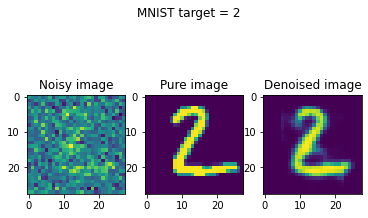

In [84]:
#Plot denoised images
for i in range(number_of_vizs):
  noisy_image = noisy_input_test[i][:,:, 0]
  pure_image = pure_test[i][:,:, 0]
  denoised_image = denoised_images[i][:,:, 0]
  input_class = targets[i]

  fig, axes = plt.subplots(1,3)
  axes[0].imshow(noisy_image)
  axes[0].set_title('Noisy image')

  axes[1].imshow(pure_image)
  axes[1].set_title('Pure image')

  axes[2].imshow(denoised_image)
  axes[2].set_title('Denoised image')

  fig.suptitle(f'MNIST target = {input_class}')
